In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [ ]:
"""
추천시스템
"""

'\n추천시스템\n'

In [ ]:
df1=pd.read_csv("tmdb_5000_credits.csv")
df2=pd.read_csv("tmdb_5000_movies.csv")

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


### df끼리 아이디 합치기

In [ ]:
"""
df1.rename(columns={'movie_id':'id'},inplace=True)
df= df1.merge(df2, on='id',how='left')

df2.rename(columns = {'id' : 'movie_id'}, inplace = True)
df = pd.merge(df1, df2, how='outer', on = 'movie_id')

pd.merge(df1,df2,right_on=['id','title'],left_on=['movie_id','title'])

df = pd.concat([df1, df2], axis=1)
df.drop(columns='id', inplace=True)

pd.concat([df1,df2], axis=1)

df2.set_index(df2.id)
df2.index.name = 'movie_id'
df1.set_index('movie_id')
pd.concat([df1,df2], axis=1)

"""


"\ndf1.rename(columns={'movie_id':'id'},inplace=True)\ndf= df1.merge(df2, on='id',how='left')\n\ndf2.rename(columns = {'id' : 'movie_id'}, inplace = True)\ndf = pd.merge(df1, df2, how='outer', on = 'movie_id')\n\npd.merge(df1,df2,right_on=['id','title'],left_on=['movie_id','title'])\n\ndf = pd.concat([df1, df2], axis=1)\ndf.drop(columns='id', inplace=True)\n\npd.concat([df1,df2], axis=1)\n\ndf2.set_index(df2.id)\ndf2.index.name = 'movie_id'\ndf1.set_index('movie_id')\npd.concat([df1,df2], axis=1)\n\n"

In [ ]:
df2.rename(columns = {'id' : 'movie_id'}, inplace = True)
df = pd.merge(df1, df2, how='outer', on = 'movie_id')

In [ ]:
df1.columns=['id', 'title', 'cast', 'crew']

In [ ]:
c=df['vote_average'].mean()
c

6.092171559442016

In [ ]:
m=df['vote_count'].quantile(0.9)
m # 영화 차트에 실리기 위한 최소 투표수

1838.4000000000015

In [ ]:
q_movies=df.loc[df["vote_count"]>m]


In [ ]:
q_movies.shape

(481, 23)

In [ ]:
def weighted_rating(x, m=m, c=c):
    v = x['vote_count']
    R = x['vote_average']
    return (v/(v+m) * R) + (m/(m+v) * c)

In [ ]:
# for문 보다는 apply를 권장 그러나 의료 데이터 같은 경우 처럼 대규에 데이터에서는 속도 차이가 심함
q_movies["score"]=q_movies.apply(weighted_rating, axis=1)

C:\Users\user\AppData\Local\Temp\ipykernel_13236\4181251221.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q_movies["score"]=q_movies.apply(weighted_rating, axis=1)


In [ ]:
q_movies.head(1)

,movie_id,title_x,cast,crew,budget,genres,homepage,keywords,original_language,original_title,...,release_date,revenue,runtime,spoken_languages,status,tagline,title_y,vote_average,vote_count,score
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,7.050669


In [ ]:
q_movies=q_movies.sort_values("score", ascending=False)

In [ ]:
pop=df.sort_values("popularity", ascending=False).head(5)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf=TfidfVectorizer(stop_words="english")

In [ ]:
df['overview']=df['overview'].fillna('')

In [ ]:
df['overview'].info()

<class 'pandas.core.series.Series'>
Int64Index: 4803 entries, 0 to 4802
Series name: overview
Non-Null Count  Dtype 
--------------  ----- 
4803 non-null   object
dtypes: object(1)
memory usage: 75.0+ KB


In [ ]:
tfidf_mat = tfidf.fit_transform(df['overview'])

In [ ]:
tfidf_mat.shape #(4803영화, 20978단어) => 차원 축소(pca, svm등)를 해서 4803, 10으로 축소 => 배우정보, 감동정보 등을 추가해서
#코사인 유사도 만들기 아니면 1 0 1 1 등 원핫 인코딩으로 할 수도 있다

(4803, 20978)

In [ ]:
from sklearn.metrics.pairwise import linear_kernel

In [ ]:
cos_sim = linear_kernel(tfidf_mat, tfidf_mat)

In [ ]:
cos_sim.shape

(4803, 4803)

In [ ]:
cos_sim[0]

array([1., 0., 0., ..., 0., 0., 0.])

In [ ]:
df['title_x']

0                                         Avatar
1       Pirates of the Caribbean: At World's End
2                                        Spectre
3                          The Dark Knight Rises
4                                    John Carter
                          ...                   
4798                                 El Mariachi
4799                                   Newlyweds
4800                   Signed, Sealed, Delivered
4801                            Shanghai Calling
4802                           My Date with Drew
Name: title_x, Length: 4803, dtype: object

In [ ]:
pd.Series(df.index, index=df['title_x'])

title_x
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

In [ ]:
indices = pd.Series(df.index, index = df['title_x'])

In [ ]:
indices

title_x
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

# 유사도 추출하기

In [ ]:
def get_recommendations(title, cosine_sim=cos_sim):
    idx=indices[title]
    print(cosine_sim[idx])

In [ ]:
get_recommendations("The Avengers")

[0.         0.         0.         ... 0.01984809 0.         0.        ]


### 리스트로 출력(영화 10편)

In [ ]:
def get_recommendations(title, cosine_sim=cos_sim):
    idx=indices[title]
    sim_scores=list(enumerate(cosine_sim[idx]))
    sim_scores=sorted(sim_scores, key=lambda x:x[1], reverse=True)
    #print(sim_scores)
    sim_scores=sim_scores[1:11]
    m_indices=[i[0] for i in sim_scores]
    return df['title_x'].iloc[m_indices]

In [ ]:
df[df["title_x"]=="The Avengers"]["overview"]

16    When an unexpected enemy emerges and threatens...
Name: overview, dtype: object

In [ ]:
get_recommendations("The Avengers")

7               Avengers: Age of Ultron
3144                            Plastic
1715                            Timecop
4124                 This Thing of Ours
3311              Thank You for Smoking
3033                      The Corruptor
588     Wall Street: Money Never Sleeps
2136         Team America: World Police
1468                       The Fountain
1286                        Snowpiercer
Name: title_x, dtype: object

In [ ]:
df

,movie_id,title_x,cast,crew,budget,genres,homepage,keywords,original_language,original_title,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title_y,vote_average,vote_count
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,...,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,9367,El Mariachi,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de...",220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,...,"[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,72766,Newlyweds,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de...",9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,[],en,Newlyweds,...,[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,231617,"Signed, Sealed, Delivered","[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de

In [ ]:
df[['cast','crew','keywords','genres']]

,cast,crew,keywords,genres
0,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
1,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""..."
2,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
3,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam..."
4,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
...,...,...,...,...
4798,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de...","[{""id"": 5616, ""name"": ""united states\u2013mexi...","[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam..."
4799,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de...",[],"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""..."
4800,"[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de...","[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...","[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam..."
4801,"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de...",[],[]


In [ ]:
df[['cast','crew','keywords','genres']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   cast      4803 non-null   object
 1   crew      4803 non-null   object
 2   keywords  4803 non-null   object
 3   genres    4803 non-null   object
dtypes: object(4)
memory usage: 187.6+ KB


# literal_eval :  타입에 대해서 검사가 엄격함

In [ ]:
from ast import literal_eval

In [ ]:
for f in ['cast','crew','keywords','genres']:
    df[f]=df[f].apply(literal_eval)

ValueError: malformed node or string: [{'cast_id': 242, 'character': 'Jake Sully', 'credit_id': '5602a8a7c3a3685532001c9a', 'gender': 2, 'id': 65731, 'name': 'Sam Worthington', 'order': 0}, {'cast_id': 3, 'character': 'Neytiri', 'credit_id': '52fe48009251416c750ac9cb', 'gender': 1, 'id': 8691, 'name': 'Zoe Saldana', 'order': 1}, {'cast_id': 25, 'character': 'Dr. Grace Augustine', 'credit_id': '52fe48009251416c750aca39', 'gender': 1, 'id': 10205, 'name': 'Sigourney Weaver', 'order': 2}, {'cast_id': 4, 'character': 'Col. Quaritch', 'credit_id': '52fe48009251416c750ac9cf', 'gender': 2, 'id': 32747, 'name': 'Stephen Lang', 'order': 3}, {'cast_id': 5, 'character': 'Trudy Chacon', 'credit_id': '52fe48009251416c750ac9d3', 'gender': 1, 'id': 17647, 'name': 'Michelle Rodriguez', 'order': 4}, {'cast_id': 8, 'character': 'Selfridge', 'credit_id': '52fe48009251416c750ac9e1', 'gender': 2, 'id': 1771, 'name': 'Giovanni Ribisi', 'order': 5}, {'cast_id': 7, 'character': 'Norm Spellman', 'credit_id': '52fe48009251416c750ac9dd', 'gender': 2, 'id': 59231, 'name': 'Joel David Moore', 'order': 6}, {'cast_id': 9, 'character': 'Moat', 'credit_id': '52fe48009251416c750ac9e5', 'gender': 1, 'id': 30485, 'name': 'CCH Pounder', 'order': 7}, {'cast_id': 11, 'character': 'Eytukan', 'credit_id': '52fe48009251416c750ac9ed', 'gender': 2, 'id': 15853, 'name': 'Wes Studi', 'order': 8}, {'cast_id': 10, 'character': "Tsu'Tey", 'credit_id': '52fe48009251416c750ac9e9', 'gender': 2, 'id': 10964, 'name': 'Laz Alonso', 'order': 9}, {'cast_id': 12, 'character': 'Dr. Max Patel', 'credit_id': '52fe48009251416c750ac9f1', 'gender': 2, 'id': 95697, 'name': 'Dileep Rao', 'order': 10}, {'cast_id': 13, 'character': 'Lyle Wainfleet', 'credit_id': '52fe48009251416c750ac9f5', 'gender': 2, 'id': 98215, 'name': 'Matt Gerald', 'order': 11}, {'cast_id': 32, 'character': 'Private Fike', 'credit_id': '52fe48009251416c750aca5b', 'gender': 2, 'id': 154153, 'name': 'Sean Anthony Moran', 'order': 12}, {'cast_id': 33, 'character': 'Cryo Vault Med Tech', 'credit_id': '52fe48009251416c750aca5f', 'gender': 2, 'id': 397312, 'name': 'Jason Whyte', 'order': 13}, {'cast_id': 34, 'character': 'Venture Star Crew Chief', 'credit_id': '52fe48009251416c750aca63', 'gender': 2, 'id': 42317, 'name': 'Scott Lawrence', 'order': 14}, {'cast_id': 35, 'character': 'Lock Up Trooper', 'credit_id': '52fe48009251416c750aca67', 'gender': 2, 'id': 986734, 'name': 'Kelly Kilgour', 'order': 15}, {'cast_id': 36, 'character': 'Shuttle Pilot', 'credit_id': '52fe48009251416c750aca6b', 'gender': 0, 'id': 1207227, 'name': 'James Patrick Pitt', 'order': 16}, {'cast_id': 37, 'character': 'Shuttle Co-Pilot', 'credit_id': '52fe48009251416c750aca6f', 'gender': 0, 'id': 1180936, 'name': 'Sean Patrick Murphy', 'order': 17}, {'cast_id': 38, 'character': 'Shuttle Crew Chief', 'credit_id': '52fe48009251416c750aca73', 'gender': 2, 'id': 1019578, 'name': 'Peter Dillon', 'order': 18}, {'cast_id': 39, 'character': 'Tractor Operator / Troupe', 'credit_id': '52fe48009251416c750aca77', 'gender': 0, 'id': 91443, 'name': 'Kevin Dorman', 'order': 19}, {'cast_id': 40, 'character': 'Dragon Gunship Pilot', 'credit_id': '52fe48009251416c750aca7b', 'gender': 2, 'id': 173391, 'name': 'Kelson Henderson', 'order': 20}, {'cast_id': 41, 'character': 'Dragon Gunship Gunner', 'credit_id': '52fe48009251416c750aca7f', 'gender': 0, 'id': 1207236, 'name': 'David Van Horn', 'order': 21}, {'cast_id': 42, 'character': 'Dragon Gunship Navigator', 'credit_id': '52fe48009251416c750aca83', 'gender': 0, 'id': 215913, 'name': 'Jacob Tomuri', 'order': 22}, {'cast_id': 43, 'character': 'Suit #1', 'credit_id': '52fe48009251416c750aca87', 'gender': 0, 'id': 143206, 'name': 'Michael Blain-Rozgay', 'order': 23}, {'cast_id': 44, 'character': 'Suit #2', 'credit_id': '52fe48009251416c750aca8b', 'gender': 2, 'id': 169676, 'name': 'Jon Curry', 'order': 24}, {'cast_id': 46, 'character': 'Ambient Room Tech', 'credit_id': '52fe48009251416c750aca8f', 'gender': 0, 'id': 1048610, 'name': 'Luke Hawker', 'order': 25}, {'cast_id': 47, 'character': 'Ambient Room Tech / Troupe', 'credit_id': '52fe48009251416c750aca93', 'gender': 0, 'id': 42288, 'name': 'Woody Schultz', 'order': 26}, {'cast_id': 48, 'character': 'Horse Clan Leader', 'credit_id': '52fe48009251416c750aca97', 'gender': 2, 'id': 68278, 'name': 'Peter Mensah', 'order': 27}, {'cast_id': 49, 'character': 'Link Room Tech', 'credit_id': '52fe48009251416c750aca9b', 'gender': 0, 'id': 1207247, 'name': 'Sonia Yee', 'order': 28}, {'cast_id': 50, 'character': 'Basketball Avatar / Troupe', 'credit_id': '52fe48009251416c750aca9f', 'gender': 1, 'id': 1207248, 'name': 'Jahnel Curfman', 'order': 29}, {'cast_id': 51, 'character': 'Basketball Avatar', 'credit_id': '52fe48009251416c750acaa3', 'gender': 0, 'id': 89714, 'name': 'Ilram Choi', 'order': 30}, {'cast_id': 52, 'character': "Na'vi Child", 'credit_id': '52fe48009251416c750acaa7', 'gender': 0, 'id': 1207249, 'name': 'Kyla Warren', 'order': 31}, {'cast_id': 53, 'character': 'Troupe', 'credit_id': '52fe48009251416c750acaab', 'gender': 0, 'id': 1207250, 'name': 'Lisa Roumain', 'order': 32}, {'cast_id': 54, 'character': 'Troupe', 'credit_id': '52fe48009251416c750acaaf', 'gender': 1, 'id': 83105, 'name': 'Debra Wilson', 'order': 33}, {'cast_id': 57, 'character': 'Troupe', 'credit_id': '52fe48009251416c750acabb', 'gender': 0, 'id': 1207253, 'name': 'Chris Mala', 'order': 34}, {'cast_id': 55, 'character': 'Troupe', 'credit_id': '52fe48009251416c750acab3', 'gender': 0, 'id': 1207251, 'name': 'Taylor Kibby', 'order': 35}, {'cast_id': 56, 'character': 'Troupe', 'credit_id': '52fe48009251416c750acab7', 'gender': 0, 'id': 1207252, 'name': 'Jodie Landau', 'order': 36}, {'cast_id': 58, 'character': 'Troupe', 'credit_id': '52fe48009251416c750acabf', 'gender': 0, 'id': 1207254, 'name': 'Julie Lamm', 'order': 37}, {'cast_id': 59, 'character': 'Troupe', 'credit_id': '52fe48009251416c750acac3', 'gender': 0, 'id': 1207257, 'name': 'Cullen B. Madden', 'order': 38}, {'cast_id': 60, 'character': 'Troupe', 'credit_id': '52fe48009251416c750acac7', 'gender': 0, 'id': 1207259, 'name': 'Joseph Brady Madden', 'order': 39}, {'cast_id': 61, 'character': 'Troupe', 'credit_id': '52fe48009251416c750acacb', 'gender': 0, 'id': 1207262, 'name': 'Frankie Torres', 'order': 40}, {'cast_id': 62, 'character': 'Troupe', 'credit_id': '52fe48009251416c750acacf', 'gender': 1, 'id': 1158600, 'name': 'Austin Wilson', 'order': 41}, {'cast_id': 63, 'character': 'Troupe', 'credit_id': '52fe48019251416c750acad3', 'gender': 1, 'id': 983705, 'name': 'Sara Wilson', 'order': 42}, {'cast_id': 64, 'character': 'Troupe', 'credit_id': '52fe48019251416c750acad7', 'gender': 0, 'id': 1207263, 'name': 'Tamica Washington-Miller', 'order': 43}, {'cast_id': 65, 'character': 'Op Center Staff', 'credit_id': '52fe48019251416c750acadb', 'gender': 1, 'id': 1145098, 'name': 'Lucy Briant', 'order': 44}, {'cast_id': 66, 'character': 'Op Center Staff', 'credit_id': '52fe48019251416c750acadf', 'gender': 2, 'id': 33305, 'name': 'Nathan Meister', 'order': 45}, {'cast_id': 67, 'character': 'Op Center Staff', 'credit_id': '52fe48019251416c750acae3', 'gender': 0, 'id': 1207264, 'name': 'Gerry Blair', 'order': 46}, {'cast_id': 68, 'character': 'Op Center Staff', 'credit_id': '52fe48019251416c750acae7', 'gender': 2, 'id': 33311, 'name': 'Matthew Chamberlain', 'order': 47}, {'cast_id': 69, 'character': 'Op Center Staff', 'credit_id': '52fe48019251416c750acaeb', 'gender': 0, 'id': 1207265, 'name': 'Paul Yates', 'order': 48}, {'cast_id': 70, 'character': 'Op Center Duty Officer', 'credit_id': '52fe48019251416c750acaef', 'gender': 0, 'id': 1207266, 'name': 'Wray Wilson', 'order': 49}, {'cast_id': 71, 'character': 'Op Center Staff', 'credit_id': '52fe48019251416c750acaf3', 'gender': 2, 'id': 54492, 'name': 'James Gaylyn', 'order': 50}, {'cast_id': 72, 'character': 'Dancer', 'credit_id': '52fe48019251416c750acaf7', 'gender': 0, 'id': 1207267, 'name': 'Melvin Leno Clark III', 'order': 51}, {'cast_id': 73, 'character': 'Dancer', 'credit_id': '52fe48019251416c750acafb', 'gender': 0, 'id': 1207268, 'name': 'Carvon Futrell', 'order': 52}, {'cast_id': 74, 'character': 'Dancer', 'credit_id': '52fe48019251416c750acaff', 'gender': 0, 'id': 1207269, 'name': 'Brandon Jelkes', 'order': 53}, {'cast_id': 75, 'character': 'Dancer', 'credit_id': '52fe48019251416c750acb03', 'gender': 0, 'id': 1207270, 'name': 'Micah Moch', 'order': 54}, {'cast_id': 76, 'character': 'Dancer', 'credit_id': '52fe48019251416c750acb07', 'gender': 0, 'id': 1207271, 'name': 'Hanniyah Muhammad', 'order': 55}, {'cast_id': 77, 'character': 'Dancer', 'credit_id': '52fe48019251416c750acb0b', 'gender': 0, 'id': 1207272, 'name': 'Christopher Nolen', 'order': 56}, {'cast_id': 78, 'character': 'Dancer', 'credit_id': '52fe48019251416c750acb0f', 'gender': 0, 'id': 1207273, 'name': 'Christa Oliver', 'order': 57}, {'cast_id': 79, 'character': 'Dancer', 'credit_id': '52fe48019251416c750acb13', 'gender': 0, 'id': 1207274, 'name': 'April Marie Thomas', 'order': 58}, {'cast_id': 80, 'character': 'Dancer', 'credit_id': '52fe48019251416c750acb17', 'gender': 0, 'id': 1207275, 'name': 'Bravita A. Threatt', 'order': 59}, {'cast_id': 81, 'character': 'Mining Chief (uncredited)', 'credit_id': '52fe48019251416c750acb1b', 'gender': 0, 'id': 1207276, 'name': 'Colin Bleasdale', 'order': 60}, {'cast_id': 82, 'character': 'Veteran Miner (uncredited)', 'credit_id': '52fe48019251416c750acb1f', 'gender': 0, 'id': 107969, 'name': 'Mike Bodnar', 'order': 61}, {'cast_id': 83, 'character': 'Richard (uncredited)', 'credit_id': '52fe48019251416c750acb23', 'gender': 0, 'id': 1207278, 'name': 'Matt Clayton', 'order': 62}, {'cast_id': 84, 'character': "Nav'i (uncredited)", 'credit_id': '52fe48019251416c750acb27', 'gender': 1, 'id': 147898, 'name': 'Nicole Dionne', 'order': 63}, {'cast_id': 85, 'character': 'Trooper (uncredited)', 'credit_id': '52fe48019251416c750acb2b', 'gender': 0, 'id': 1207280, 'name': 'Jamie Harrison', 'order': 64}, {'cast_id': 86, 'character': 'Trooper (uncredited)', 'credit_id': '52fe48019251416c750acb2f', 'gender': 0, 'id': 1207281, 'name': 'Allan Henry', 'order': 65}, {'cast_id': 87, 'character': 'Ground Technician (uncredited)', 'credit_id': '52fe48019251416c750acb33', 'gender': 2, 'id': 1207282, 'name': 'Anthony Ingruber', 'order': 66}, {'cast_id': 88, 'character': 'Flight Crew Mechanic (uncredited)', 'credit_id': '52fe48019251416c750acb37', 'gender': 0, 'id': 1207283, 'name': 'Ashley Jeffery', 'order': 67}, {'cast_id': 14, 'character': 'Samson Pilot', 'credit_id': '52fe48009251416c750ac9f9', 'gender': 0, 'id': 98216, 'name': 'Dean Knowsley', 'order': 68}, {'cast_id': 89, 'character': 'Trooper (uncredited)', 'credit_id': '52fe48019251416c750acb3b', 'gender': 0, 'id': 1201399, 'name': 'Joseph Mika-Hunt', 'order': 69}, {'cast_id': 90, 'character': 'Banshee (uncredited)', 'credit_id': '52fe48019251416c750acb3f', 'gender': 0, 'id': 236696, 'name': 'Terry Notary', 'order': 70}, {'cast_id': 91, 'character': 'Soldier (uncredited)', 'credit_id': '52fe48019251416c750acb43', 'gender': 0, 'id': 1207287, 'name': 'Kai Pantano', 'order': 71}, {'cast_id': 92, 'character': 'Blast Technician (uncredited)', 'credit_id': '52fe48019251416c750acb47', 'gender': 0, 'id': 1207288, 'name': 'Logan Pithyou', 'order': 72}, {'cast_id': 93, 'character': 'Vindum Raah (uncredited)', 'credit_id': '52fe48019251416c750acb4b', 'gender': 0, 'id': 1207289, 'name': 'Stuart Pollock', 'order': 73}, {'cast_id': 94, 'character': 'Hero (uncredited)', 'credit_id': '52fe48019251416c750acb4f', 'gender': 0, 'id': 584868, 'name': 'Raja', 'order': 74}, {'cast_id': 95, 'character': 'Ops Centreworker (uncredited)', 'credit_id': '52fe48019251416c750acb53', 'gender': 0, 'id': 1207290, 'name': 'Gareth Ruck', 'order': 75}, {'cast_id': 96, 'character': 'Engineer (uncredited)', 'credit_id': '52fe48019251416c750acb57', 'gender': 0, 'id': 1062463, 'name': 'Rhian Sheehan', 'order': 76}, {'cast_id': 97, 'character': "Col. Quaritch's Mech Suit (uncredited)", 'credit_id': '52fe48019251416c750acb5b', 'gender': 0, 'id': 60656, 'name': 'T. J. Storm', 'order': 77}, {'cast_id': 98, 'character': 'Female Marine (uncredited)', 'credit_id': '52fe48019251416c750acb5f', 'gender': 0, 'id': 1207291, 'name': 'Jodie Taylor', 'order': 78}, {'cast_id': 99, 'character': 'Ikran Clan Leader (uncredited)', 'credit_id': '52fe48019251416c750acb63', 'gender': 1, 'id': 1186027, 'name': 'Alicia Vela-Bailey', 'order': 79}, {'cast_id': 100, 'character': 'Geologist (uncredited)', 'credit_id': '52fe48019251416c750acb67', 'gender': 0, 'id': 1207292, 'name': 'Richard Whiteside', 'order': 80}, {'cast_id': 101, 'character': "Na'vi (uncredited)", 'credit_id': '52fe48019251416c750acb6b', 'gender': 0, 'id': 103259, 'name': 'Nikie Zambo', 'order': 81}, {'cast_id': 102, 'character': 'Ambient Room Tech / Troupe', 'credit_id': '52fe48019251416c750acb6f', 'gender': 1, 'id': 42286, 'name': 'Julene Renee', 'order': 82}]

# eval

In [ ]:
for f in ['cast','crew','keywords','genres']:
    df[f]=df[f].apply(eval)

In [ ]:
df

,movie_id,title_x,cast,crew,budget,genres,homepage,keywords,original_language,original_title,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title_y,vote_average,vote_count
0,19995,Avatar,"[{'cast_id': 242, 'character': 'Jake Sully', '...","[{'credit_id': '52fe48009251416c750aca23', 'de...",237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,"[{'id': 1463, 'name': 'culture clash'}, {'id':...",en,Avatar,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,285,Pirates of the Caribbean: At World's End,"[{'cast_id': 4, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4232c3a36847f800b579', 'de...",300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://disney.go.com/disneypictures/pirates/,"[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...",en,Pirates of the Caribbean: At World's End,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,206647,Spectre,"[{'cast_id': 1, 'character': 'James Bond', 'cr...","[{'credit_id': '54805967c3a36829b5002c41', 'de...",245000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.sonypictures.com/movies/spectre/,"[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...",en,Spectre,...,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,49026,The Dark Knight Rises,"[{'cast_id': 2, 'character': 'Bruce Wayne / Ba...","[{'credit_id': '52fe4781c3a36847f81398c3', 'de...",250000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",http://www.thedarkknightrises.com/,"[{'id': 849, 'name': 'dc comics'}, {'id': 853,...",en,The Dark Knight Rises,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,49529,John Carter,"[{'cast_id': 5, 'character': 'John Carter', 'c...","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de...",260000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://movies.disney.com/john-carter,"[{'id': 818, 'name': 'based on novel'}, {'id':...",en,John Carter,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,9367,El Mariachi,"[{'cast_id': 1, 'character': 'El Mariachi', 'c...","[{'credit_id': '52fe44eec3a36847f80b280b', 'de...",220000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,"[{'id': 5616, 'name': 'united states–mexico ba...",es,El Mariachi,...,"[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,72766,Newlyweds,"[{'cast_id': 1, 'character': 'Buzzy', 'credit_...","[{'credit_id': '52fe487dc3a368484e0fb013', 'de...",9000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,[],en,Newlyweds,...,[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,231617,"Signed, Sealed, Delivered","[{'cast_id': 8, 'character': 'Oliver O’Toole',...","[{'credit_id': '52fe4df3c3a36847f8275ecf', 'de...",0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",http://www.hallmarkchannel.com/signedsealeddel...,"[{'id': 248, 'name': 'date'}, {'id': 699, 'nam...",en,"Signed, Sealed, Delivered",...,"[{"

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   movie_id              4803 non-null   int64  
 1   title_x               4803 non-null   object 
 2   cast                  4803 non-null   object 
 3   crew                  4803 non-null   object 
 4   budget                4803 non-null   int64  
 5   genres                4803 non-null   object 
 6   homepage              1712 non-null   object 
 7   keywords              4803 non-null   object 
 8   original_language     4803 non-null   object 
 9   original_title        4803 non-null   object 
 10  overview              4803 non-null   object 
 11  popularity            4803 non-null   float64
 12  production_companies  4803 non-null   object 
 13  production_countries  4803 non-null   object 
 14  release_date          4802 non-null   object 
 15  revenue              

In [ ]:
df["crew"][0]

[{'credit_id': '52fe48009251416c750aca23',
  'department': 'Editing',
  'gender': 0,
  'id': 1721,
  'job': 'Editor',
  'name': 'Stephen E. Rivkin'},
 {'credit_id': '539c47ecc3a36810e3001f87',
  'department': 'Art',
  'gender': 2,
  'id': 496,
  'job': 'Production Design',
  'name': 'Rick Carter'},
 {'credit_id': '54491c89c3a3680fb4001cf7',
  'department': 'Sound',
  'gender': 0,
  'id': 900,
  'job': 'Sound Designer',
  'name': 'Christopher Boyes'},
 {'credit_id': '54491cb70e0a267480001bd0',
  'department': 'Sound',
  'gender': 0,
  'id': 900,
  'job': 'Supervising Sound Editor',
  'name': 'Christopher Boyes'},
 {'credit_id': '539c4a4cc3a36810c9002101',
  'department': 'Production',
  'gender': 1,
  'id': 1262,
  'job': 'Casting',
  'name': 'Mali Finn'},
 {'credit_id': '5544ee3b925141499f0008fc',
  'department': 'Sound',
  'gender': 2,
  'id': 1729,
  'job': 'Original Music Composer',
  'name': 'James Horner'},
 {'credit_id': '52fe48009251416c750ac9c3',
  'department': 'Directing',
  

In [ ]:
df["crew"].iloc[0]

[{'credit_id': '52fe48009251416c750aca23',
  'department': 'Editing',
  'gender': 0,
  'id': 1721,
  'job': 'Editor',
  'name': 'Stephen E. Rivkin'},
 {'credit_id': '539c47ecc3a36810e3001f87',
  'department': 'Art',
  'gender': 2,
  'id': 496,
  'job': 'Production Design',
  'name': 'Rick Carter'},
 {'credit_id': '54491c89c3a3680fb4001cf7',
  'department': 'Sound',
  'gender': 0,
  'id': 900,
  'job': 'Sound Designer',
  'name': 'Christopher Boyes'},
 {'credit_id': '54491cb70e0a267480001bd0',
  'department': 'Sound',
  'gender': 0,
  'id': 900,
  'job': 'Supervising Sound Editor',
  'name': 'Christopher Boyes'},
 {'credit_id': '539c4a4cc3a36810c9002101',
  'department': 'Production',
  'gender': 1,
  'id': 1262,
  'job': 'Casting',
  'name': 'Mali Finn'},
 {'credit_id': '5544ee3b925141499f0008fc',
  'department': 'Sound',
  'gender': 2,
  'id': 1729,
  'job': 'Original Music Composer',
  'name': 'James Horner'},
 {'credit_id': '52fe48009251416c750ac9c3',
  'department': 'Directing',
  

# Job이 director에 대항되는 이름 추출

In [ ]:
def getDirector(data):
    for i in data:
        if i["job"]=="Director":
            return i["name"]
    return np.nan

In [ ]:
df["Director"]=df["crew"]  .apply(getDirector)

In [ ]:
df.head()

,movie_id,title_x,cast,crew,budget,genres,homepage,keywords,original_language,original_title,...,release_date,revenue,runtime,spoken_languages,status,tagline,title_y,vote_average,vote_count,Director
0,19995,Avatar,"[{'cast_id': 242, 'character': 'Jake Sully', '...","[{'credit_id': '52fe48009251416c750aca23', 'de...",237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,"[{'id': 1463, 'name': 'culture clash'}, {'id':...",en,Avatar,...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,James Cameron
1,285,Pirates of the Caribbean: At World's End,"[{'cast_id': 4, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4232c3a36847f800b579', 'de...",300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://disney.go.com/disneypictures/pirates/,"[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...",en,Pirates of the Caribbean: At World's End,...,2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Gore Verbinski
2,206647,Spectre,"[{'cast_id': 1, 'character': 'James Bond', 'cr...","[{'credit_id': '54805967c3a36829b5002c41', 'de...",245000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.sonypictures.com/movies/spectre/,"[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...",en,Spectre,...,2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Sam Mendes
3,49026,The Dark Knight Rises,"[{'cast_id': 2, 'character': 'Bruce Wayne / Ba...","[{'credit_id': '52fe4781c3a36847f81398c3', 'de...",250000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",http://www.thedarkknightrises.com/,"[{'id': 849, 'name': 'dc comics'}, {'id': 853,...",en,The Dark Knight Rises,...,2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christopher Nolan
4,49529,John Carter,"[{'cast_id': 5, 'character': 'John Carter', 'c...","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de...",260000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://movies.disney.com/john-carter,"[{'id': 818, 'name': 'based on novel'}, {'id':...",en,John Carter,...,2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Andrew Stanton


# 차원축소 : pca 여러개의 변수들 간의 상관관계를 이용해서 가장 주가 되는 성분을 추출하는 식으로 차원을 축소하는것이며
### 분산이 가장 높은 축을 주축이라고 한다
        - 선형대수 (데이터 마이닝)
        - pca에선 데이터의 공분산 행렬을 구하고 -> 고유값 분해 -> 고유벡터의 데이터를 선형변환
        - 고유벡터 : pca의 주성분벡터, 입력데이터의 분산이 가장 큰 방향
        - 고유값 : 고유벡터의 크기, 입력 데이터의 분산이 되기도 함
##### 과정
    1. 원본 데이터의 공분산 행렬
    2. 공분산 행렬과 고유값 고유벡터를 구함
    3. 고유값이 가장 큰 고유벡터를 추출(축소하고자 하는 차원의 수만큼), 예를 들어 5차원이라면 고유벡터 5개를 추출하는 방법
    4. 고유값이 가장 큰 고유벡터를 이용하여 원본 데이터를 변환한다(차원 축소한다)
    

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()

columns = ['sepal_length','sepal_width','petal_length','petal_width']
iris_df = pd.DataFrame(data = iris.data, columns = columns)
iris_df["target"] = iris.target

iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
import matplotlib.pyplot as plt

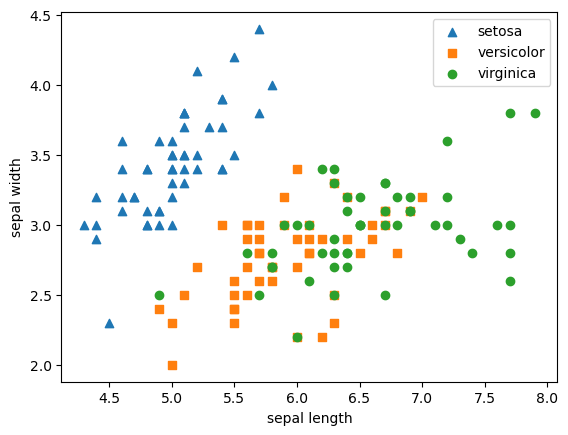

In [ ]:
markers = ["^", "s", "o"]

# 0:setosa, 1:versicolor, 2:virginica
for i, marker in enumerate(markers):
    x_axis_data = iris_df[iris_df['target']==i]['sepal_length']
    y_axis_data = iris_df[iris_df['target']==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

# 스케일링

In [ ]:
from sklearn.preprocessing import StandardScaler #표준화

iris_f_scaled = StandardScaler().fit_transform(iris_df.iloc[:,:-1])

In [ ]:
iris_f_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

# 4차원을 2차원으로 줄이기
# pca를 통한 차원축소에서는 정보의 손실이 발생한다

In [ ]:
from sklearn.decomposition import PCA #차원축소

In [ ]:
pca=PCA(n_components=2)
pca

PCA(n_components=2)

In [ ]:
pca.fit(iris_f_scaled) #4차원이 2차원으로 축소

PCA(n_components=2)

In [ ]:
iris_pca=pca.transform(iris_f_scaled)

In [ ]:
iris_pca.shape # 2차원

(150, 2)

In [ ]:
iris_f_scaled.shape #4차원

(150, 4)

In [ ]:
iris_pca

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

### 차원축소를 아래를 통해서 알 수 있다
## 4차원에서 100이던 것이 array([0.72962445, 0.22850762])를 통해 약 0.95 ~0.96이 나오면서 정보의 손실이 있음을 알 수 있다

In [ ]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

In [ ]:
iris_pca[:5] #차원축소

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538]])

In [ ]:
iris_f_scaled[:5] # 표준화

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [ ]:
iris_df

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
pca_columns=['pca_component_1','pca_component_2']

In [ ]:
iris_df_pca = pd.DataFrame(iris_pca, columns = pca_columns)
iris_df_pca['target'] = iris.target

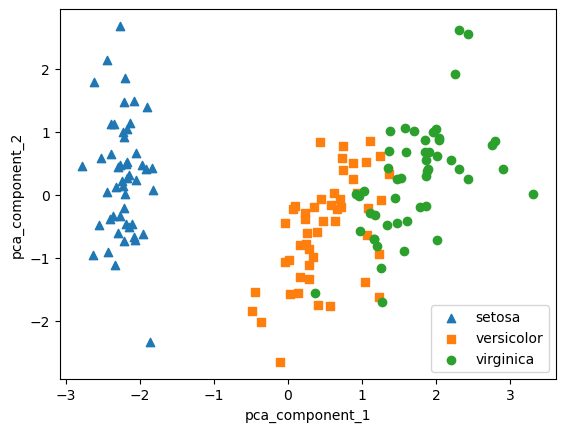

In [ ]:
markers = ["^", "s", "o"]

# 0:setosa, 1:versicolor, 2:virginica
for i, marker in enumerate(markers):
    x_axis_data = iris_df_pca[iris_df_pca['target']==i]['pca_component_1']
    y_axis_data = iris_df_pca[iris_df_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

In [ ]:
iris_df

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
rcf = RandomForestClassifier(random_state=1017)


scores = cross_val_score(rcf, iris_df.iloc[:,:-1], iris_df.target, scoring = "accuracy", cv = 3)

print(f"원본 데이터 fold별 정확도: {scores}")
print(f"원본 데이터 평균 정확도: {np.mean(scores):.4f}")

원본 데이터 fold별 정확도: [0.98 0.94 0.92]
원본 데이터 평균 정확도: 0.9467


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
rcf = RandomForestClassifier(random_state=1017)


scores = cross_val_score(rcf, iris_df_pca.iloc[:,:-1], iris_df_pca.target, scoring = "accuracy", cv = 3)

print(f"원본 데이터 fold별 정확도: {scores}")
print(f"원본 데이터 평균 정확도: {np.mean(scores):.4f}")

원본 데이터 fold별 정확도: [0.88 0.88 0.88]
원본 데이터 평균 정확도: 0.8800


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
rcf = RandomForestClassifier(random_state=1017)


scores = cross_val_score(rcf, iris_df.iloc[:,:2], iris_df.target, scoring = "accuracy", cv = 3)

print(f"원본 데이터 fold별 정확도: {scores}")
print(f"원본 데이터 평균 정확도: {np.mean(scores):.4f}")

원본 데이터 fold별 정확도: [0.72 0.76 0.68]
원본 데이터 평균 정확도: 0.7200


# 차원을 줄이는 이유 : 대표적으로 메모리 문제

In [ ]:
# (4803, 20978)건에 대한 데이터량
4803*20978*4/1000000

403.029336

In [ ]:
# (4803, 100)건에 대한 데이터량
4803*100*4/1000000

1.9212